# Reading_Handwritten_Digits

Here is the code that load the <code>mnist</code> dataset from <code>tensorflow.keras.datasets</code> and design a fully-connected Neural Network to classify them in 10 classes. Then we use the trained model to read and predict the digits of the test set.

### By: ZaraPhCode

Importing necessary modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Loading the <code>mnist</code> dataset from <code>tensorflow.keras.datasets</code> as train and test sets, and normalizing the data:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Lets plot 16 first data of the training set along with their labels:

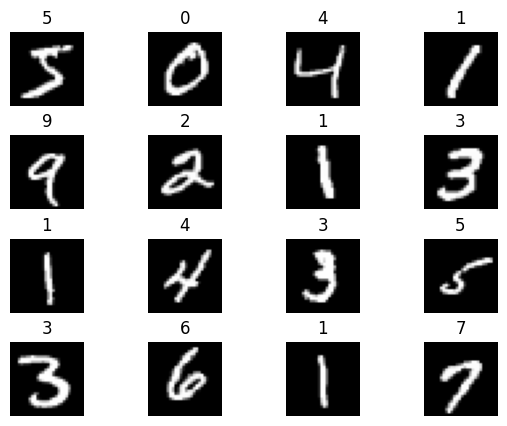

In [5]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i] , cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

We should know the dimension of our data for NN design.

In [3]:
x_train.shape

(60000, 28, 28)

Now, we can design the network architecture:

I used CNN architecture:

In [6]:
h = w = 28

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1.0, input_shape=(h,w,1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, name="outputs")
])

Defining the loss function:

(as the problem is non-binary and the labels are digits, we should use <code>SparseCategoricalCrossentropy</code> loss function)

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

We should compile the model before training:

In [8]:
EPOCHS = 10

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Now, we han train the model and keep the metrics of each epoch at variable <code>history</code>:

In [12]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0253 - val_accuracy: 0.9935
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0278 - val_accuracy: 0.9914
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0262 - val_accuracy: 0.9922
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0400 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0340 - val_accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0100 - accuracy: 0.9964 - val_loss: 0.0327 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0410 - val_

The mnist dataset is a small and easy dataset. We do not need a deep network with large number of weights. The CNN network we chose is too deep for this simple dataset. Thats because we have such a good result: almost 100%  !!

Lets plot the <code>loss</code> and <code>accuracy</code> as a function of epochs:

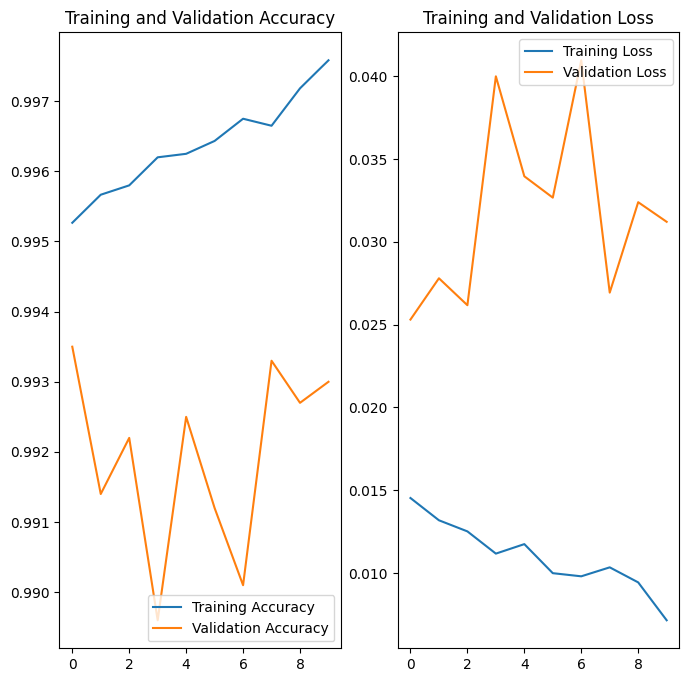

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We should use <code>softmax</code> activation function to have the model output as probabilities:

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

Now we can predict the label of each data by simply using <code>np.argmax(probability_model(data))</code>. 

Lets plot the first 16 of our test set along with their actual and predicted labels:

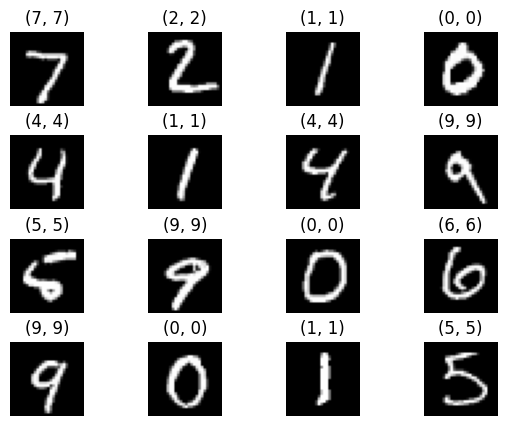

In [16]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i] , cmap='gray')
    prediction = np.argmax(probability_model(x_test[i:i+1]))
    plt.title('({}, {})'.format(y_test[i:i+1][0],prediction))
    plt.axis('off')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()